In [116]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from patsy import dmatrices
from sklearn import linear_model, preprocessing, model_selection
%matplotlib inline

In [63]:
df=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [9]:
df.shape

(891, 12)

In [10]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
fig=plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [12]:
alpha=alpha_scatterplot=0.2
alpha_bar_chart=0.55

Check the count of Survived(1) and not Survived(0)

Text(0.5, 1.0, 'Distribution of Survival')

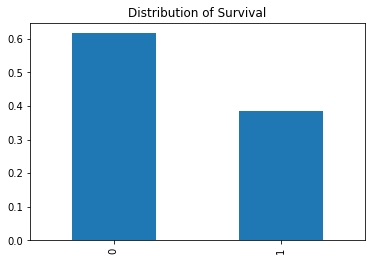

In [14]:

df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Distribution of Survival')

survival rate according to sex

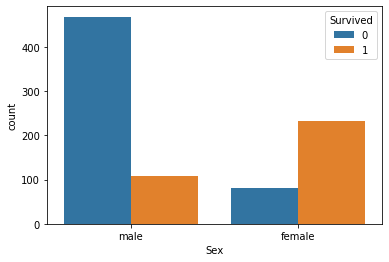

In [15]:


sns.countplot(x='Sex', hue='Survived', data=df)

check the survived rate according to sex

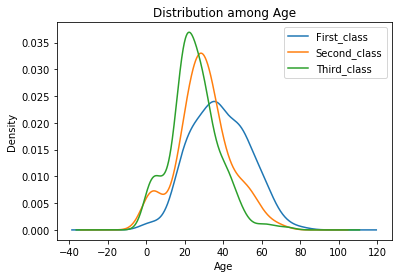

In [19]:
for x in [1,2,3]:
    df.Age[df.Pclass==x].plot(kind='kde')
    plt.title('Distribution among Age')
    plt.xlabel('Age')
    plt.legend(("First_class", 'Second_class', 'Third_class'))

Text(0.5, 1.0, 'passengers boarding location')

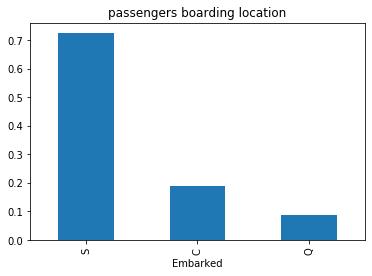

In [26]:
df['Embarked'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Embarked')
plt.title('passengers boarding location')

In [20]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [21]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Drop Fare column as we cannot extract anything from that column

In [27]:
df.drop('Fare', axis=1,inplace=True)

In [28]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,C85,C


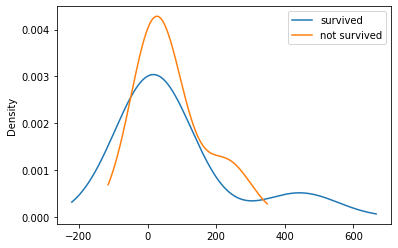

In [32]:
for x in [0,1]:
    df.Parch[df['Survived']==x].value_counts().plot(kind='kde')
    plt.legend(('survived','not survived'))

In [37]:
byPclass=df.groupby(by='Pclass', axis=0,as_index=True).count()

In [38]:
byPclass

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked
Pclass,,,,,,,,,,
1,216,216,216,216,186,216,216,216,176,214
2,184,184,184,184,173,184,184,184,16,184
3,491,491,491,491,355,491,491,491,12,491


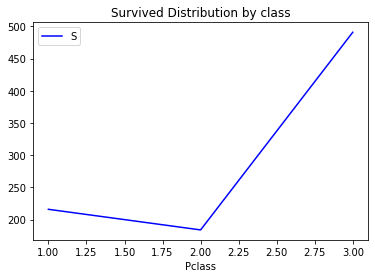

In [40]:
plt.plot(byPclass.index, byPclass['Survived'], 'b')
plt.title('Survived Distribution by class')
plt.xlabel('Pclass')
plt.legend('Survived')

In [61]:
df.drop(columns=['SibSp','Ticket']).head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,C123,S


Text(0.5, 1.0, 'Who survived with respect to gender and class')

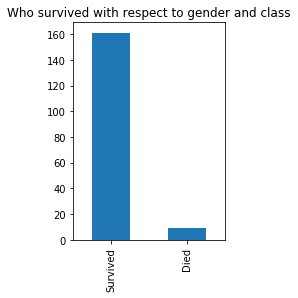

In [94]:
ax=plt.subplot(121)
female_hc=df.Survived[df.Sex=='female'][df.Pclass!=3].value_counts()
female_hc.plot(kind='bar')
ax.set_xticklabels(['Survived', 'Died'])
plt.title('Who survived with respect to gender and class')

[Text(0, 0, 'Survived'), Text(0, 0, 'Died')]

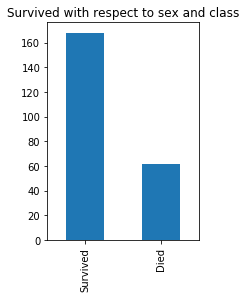

In [103]:
ax=plt.subplot(122)
male_hc=df.Survived[df.Sex=='male'][df.Pclass!=3].value_counts()
male_hc.plot(kind='bar')
plt.title('Survived with respect to sex and class')
ax.set_xticklabels(['Survived', 'Died'])


[Text(0, 0, 'Survived'), Text(0, 0, 'Died')]

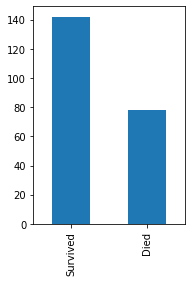

In [108]:
ax=plt.subplot(121)
female_lc=df.Survived[df.Sex=='female'][df.Pclass!=1].value_counts()
female_lc.plot(kind='bar')
ax.set_xticklabels(['Survived', 'Died'])

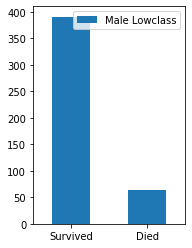

In [113]:
ax=plt.subplot(121)
male_lc=df.Survived[df.Sex=='male'][df.Pclass!=1].value_counts()
male_lc.plot(kind='bar', label='Male Lowclass')
ax.set_xticklabels(['Survived','Died'], rotation=0)
plt.legend(loc='best')

Logistic Regression


In [126]:
formula= 'Survived ~ Pclass + Sex + Age + SibSp + Embarked'
results={}

In [128]:
y,x=dmatrices(formula, data=df, return_type='dataframe')
model=sm.Logit(y,x)


In [132]:
res=model.fit()
results['Logit']=[res,formula]
res.summary()

Optimization terminated successfully.
         Current function value: 0.444393
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Sat, 02 May 2020   Pseudo R-squ.:                  0.3414
Time:                        10:56:29   Log-Likelihood:                -316.41
converged:                       True   LL-Null:                       -480.45
Covariance Type:            nonrobust   LLR p-value:                 7.776e-68
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.7798      0.562     10.290      0.000       4.679       6.881
Sex[T.male]      -2.6227      0.217    -12.084      0.000      -3.048      -2.197
Embarked[T.Q]    -0.8354      0.597     -1.399      0.162      -2.006       0.335
Embarked[T.S]    -0.4303      0.264     -1.629      0.103      -0.948       0.087
Pclass           -1.2458      0.145     -8.586      0.000      -1.530      -0.961
Age              -0.0435      0.008     -5.302      0.000      -0.060      -0.027
SibSp            -0.3687      0.122     -3.012      0.003      -0.609      -0.129
=================================================================================
"""